In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D2search_results_Race in America.csv')
df

,user_country,source,content,date
0,"San Francisco, CA",Twitter Web App,Topics for tonight's #Debates2020: Fighting C...,2020-10-22T23:59:03+00:00
1,"San Diego, CA",Twitter for iPhone,@voxdotcom Covid: Trump failed to lead &amp; p...,2020-10-22T23:57:33+00:00
2,NaN,Twitter Web App,"Kristen Welker, moderator, has selected the to...",2020-10-22T23:57:02+00:00
3,NaN,Twitter for Android,"And black women wonder why, in America, statis...",2020-10-22T23:56:50+00:00
4,NaN,Twitter Web App,@NicoletteGlazer It would be nice if there cou...,2020-10-22T23:55:20+00:00
...,...,...,...,...
358,NaN,Twitter for iPhone,Will you be tuning in to the 2nd and final Pre...,2020-10-22T00:18:48+00:00
359,Melbs,Twitter for iPhone,The concept of race and ethnicity in America i...,2020-10-22T00:15:14+00:00
360,"Salt Lake City, Utah",SocialFlow,Anyone — Regardless of Race or Gender — Can Su...,2020-10-22T00:13:40+00:00
361,"Port Saint Lucie, FL",WordPress.com,David Barton | History of Race in America | 10...,2020-10-22T00:01:28+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

14902
['topics', 'for', "tonight's", '#debates2020', ':', 'fighting', 'covid', '-', '19', 'american', 'families', 'race', 'in', 'america', 'climate', 'change', 'national', 'security', 'leadership', '#vote2020']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 227.42%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

6598
['topics', "tonight's", 'fighting', 'covid', 'american', 'families', 'race', 'america', 'climate', 'change', 'national', 'security', 'leadership', 'covid', 'trump', 'failed', 'lead', 'people', 'died', 'american']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 20),
 ('@joebiden', 10),
 ('@kwelkernbc', 7),
 ('@debates', 4),
 ('@donaldjtrumpjr', 3),
 ('@nytimes', 3),
 ('@emilywestfahey', 3),
 ('@wftate4', 2),
 ('@drjwilliams4', 2),
 ('@journoresource', 2),
 ('@msnbc', 2),
 ('@ritz_006', 2),
 ('@happenchances', 2),
 ('@nhannahjones', 2),
 ('@ingrahamangle', 2),
 ('@barackobama', 2),
 ('@belmontuniv', 2),
 ('@raioxford', 2),
 ('@voxdotcom', 1),
 ('@matt84001253', 1)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,"San Francisco, CA",Twitter Web App,Topics for tonight's #Debates2020: Fighting C...,2020-10-22T23:59:03+00:00,Neutral
1,"San Diego, CA",Twitter for iPhone,@voxdotcom Covid: Trump failed to lead &amp; p...,2020-10-22T23:57:33+00:00,Positive
2,NaN,Twitter Web App,"Kristen Welker, moderator, has selected the to...",2020-10-22T23:57:02+00:00,Neutral
3,NaN,Twitter for Android,"And black women wonder why, in America, statis...",2020-10-22T23:56:50+00:00,Positive
4,NaN,Twitter Web App,@NicoletteGlazer It would be nice if there cou...,2020-10-22T23:55:20+00:00,Positive
...,...,...,...,...,...
358,NaN,Twitter for iPhone,Will you be tuning in to the 2nd and final Pre...,2020-10-22T00:18:48+00:00,Positive
359,Melbs,Twitter for iPhone,The concept of race and ethnicity in America i...,2020-10-22T00:15:14+00:00,Negative
360,"Salt Lake City, Utah",SocialFlow,Anyone — Regardless of Race or Gender — Can Su...,2020-10-22T00:13:40+00:00,Neutral
361,"Port Saint Lucie, FL",WordPress.com,David Barton | History of Race in America | 10...,2020-10-22T00:01:28+00:00,Neutral


In [11]:
df.sentiment.value_counts()

Positive    161
Neutral     106
Negative     96
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 44.35%
Percentage of neutral tweets: 29.20%
Percentage of negative tweets: 26.45%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

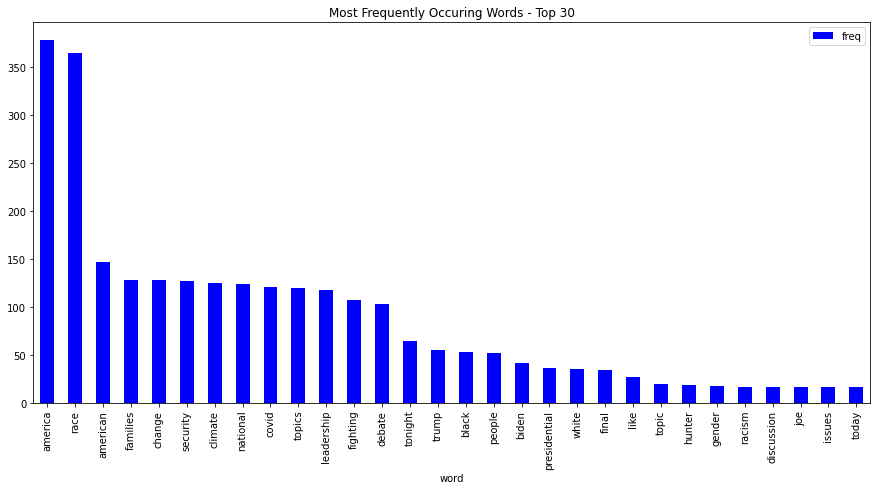

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

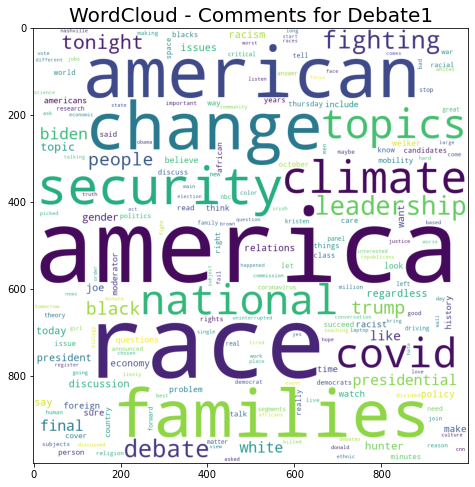

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

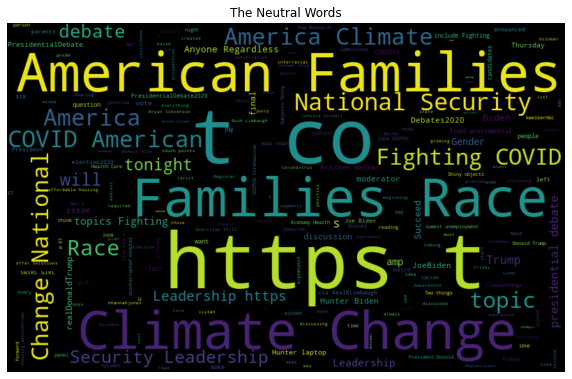

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

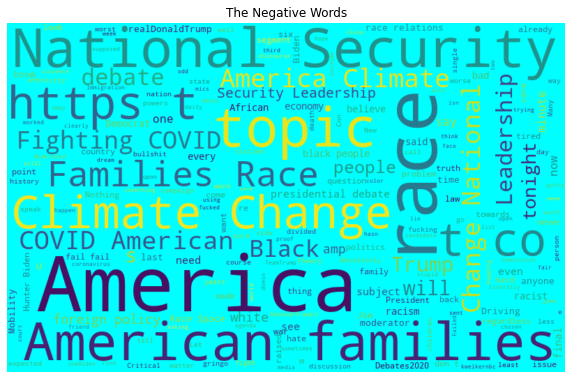

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

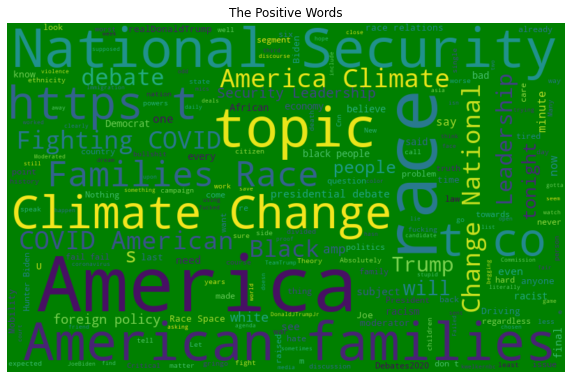

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,Topics for tonight's #Debates2020: Fighting C...,Neutral
1,@voxdotcom Covid: Trump failed to lead &amp; p...,Positive
2,"Kristen Welker, moderator, has selected the to...",Neutral
3,"And black women wonder why, in America, statis...",Positive
4,@NicoletteGlazer It would be nice if there cou...,Positive
...,...,...
358,Will you be tuning in to the 2nd and final Pre...,Positive
359,The concept of race and ethnicity in America i...,Negative
360,Anyone — Regardless of Race or Gender — Can Su...,Neutral
361,David Barton | History of Race in America | 10...,Neutral


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Neutral,topics for tonight s debates fighting covid am...
1,Positive,covid trump failed to lead people died america...
2,Neutral,kristen welker moderator has selected the topi...
3,Positive,and black women wonder why in america statisti...
4,Positive,it would be nice if there could be a way to wo...
...,...,...
358,Positive,will you be tuning in to the nd and final pres...
359,Negative,the concept of race and ethnicity in america i...
360,Neutral,anyone regardless of race or gender can succee...
361,Neutral,david barton history of race in america


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
1,Positive,covid trump failed to lead people died america...
3,Positive,and black women wonder why in america statisti...
4,Positive,it would be nice if there could be a way to wo...
5,Positive,i m a brit living in florida so my exposure to...
7,Positive,monday october at pm join mia and the restorat...
...,...,...
351,Negative,that is not the law in america now every ameri...
352,Negative,driving while black race space and mobility in...
356,Negative,dickhead genocide of any race is bad when this...
359,Negative,the concept of race and ethnicity in america i...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
1,1,covid trump failed to lead people died america...
3,1,and black women wonder why in america statisti...
4,1,it would be nice if there could be a way to wo...
5,1,i m a brit living in florida so my exposure to...
7,1,monday october at pm join mia and the restorat...
...,...,...
351,0,that is not the law in america now every ameri...
352,0,driving while black race space and mobility in...
356,0,dickhead genocide of any race is bad when this...
359,0,the concept of race and ethnicity in america i...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(192, 2)
(65, 2)


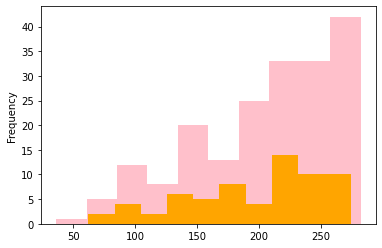

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(73993, 140000)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('joe', 0.9885611534118652),
 ('hunter', 0.9832876920700073),
 ('science', 0.9816024303436279),
 ('jr', 0.9808193445205688),
 ('biden', 0.979481041431427),
 ('obviously', 0.9754478931427002),
 ('whats', 0.9740641117095947),
 ('yeah', 0.9739557504653931),
 ('wow', 0.9732494950294495),
 ('read', 0.972063422203064)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('national', -0.5112701654434204),
 ('climate', -0.5191091299057007),
 ('families', -0.5258152484893799),
 ('security', -0.5269984006881714),
 ('leadership', -0.5272771120071411),
 ('change', -0.533593475818634),
 ('fighting', -0.5421847105026245),
 ('fail', -0.5424984097480774),
 ('covid', -0.5472489595413208),
 ('include', -0.577120304107666)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(192, 500)
(192,)
(65, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.49230769230769234
F1 score : 0.6292134831460675
[[ 4 23]
 [10 28]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.6
f1 score : 0.7291666666666666
[[ 4 23]
 [ 3 35]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.4307692307692308
f1 score : 0.5066666666666666
[[ 9 18]
 [19 19]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9583333333333334
Validation Accuracy : 0.5846153846153846
f1 score : 0.7378640776699029
[[ 0 27]
 [ 0 38]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 this was supposed to be the third debate but trump backed out of last week s event after it was moved to a remote format following his coronavirus diagnosis tonight s six topics fighting covid american families race in america climate change national security leadership 

First sample after preprocessing: 
 [ 34  46 384   5  19   2 271  20  55  40  94   8 177 385  11 272 386  10
  46   5   7  82  42  11 119  31  35  24  16  25   4   1   3  26  21  30
  29  27   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
2/2 - 0s - loss: 0.6979 - accuracy: 0.4186 - val_loss: 0.6703 - val_accuracy: 0.7000
Epoch 2/20
2/2 - 0s - loss: 0.6726 - accuracy: 0.6337 - val_loss: 0.6487 - val_accuracy: 0.7000
Epoch 3/20
2/2 - 0s - loss: 0.6580 - accuracy: 0.6337 - val_loss: 0.6328 - val_accuracy: 0.7000
Epoch 4/20
2/2 - 0s - loss: 0.6556 - accuracy: 0.6337 - val_loss: 0.6221 - val_accuracy: 0.7000
Epoch 5/20
2/2 - 0s - loss: 0.6597 - accuracy: 0.6337 - val_loss: 0.6180 - val_accuracy: 0.7000
Epoch 6/20
2/2 - 0s - loss: 0.6594 - accuracy: 0.6337 - val_loss: 0.6186 - val_accuracy: 0.7000
Epoch 7/20
2/2 - 0s - loss: 0.6547 - accuracy: 0.6337 - val_loss: 0.6206 - val_accuracy: 0.7000
Epoch 8/20
2/2 - 0s - loss: 0.6471 - accuracy: 0.6337 - val_loss: 0.6233 - val_accuracy: 0.7000
Epoch 9/20
2/2 - 0s - loss: 0.6472 - accuracy: 0.6337 - val_loss: 0.6253 - val_accuracy: 0.7000
Epoch 10/20
2/2 - 0s - loss: 0.6415 - accuracy: 0.6337 - val_loss: 0.6257 - val_accuracy: 0.7000
Epoch 11/20
2/2 - 0s - loss: 0.6404 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,-1,topics for tonight s debates fighting covid am...
1,1,covid trump failed to lead people died america...
2,-1,kristen welker moderator has selected the topi...
3,1,and black women wonder why in america statisti...
4,1,it would be nice if there could be a way to wo...
...,...,...
358,1,will you be tuning in to the nd and final pres...
359,0,the concept of race and ethnicity in america i...
360,-1,anyone regardless of race or gender can succee...
361,-1,david barton history of race in america


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(272, 500)
(272,)
(91, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(272, 500)
(91, 500)
(272,)
(91,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.32967032967032966
F1 score : [0.44       0.05882353 0.29166667]
[[22  0  2]
 [27  1  2]
 [27  3  7]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.3076923076923077
f1 score : [0.34285714 0.2        0.33333333]
[[12  3  9]
 [12  4 14]
 [22  3 12]]


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.38461538461538464
f1 score : [0.51948052 0.31372549 0.25925926]
[[20  1  3]
 [15  8  7]
 [18 12  7]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8308823529411765
Validation Accuracy : 0.43956043956043955
f1 score : [0.3030303  0.         0.58823529]
[[ 5  0 19]
 [ 2  0 28]
 [ 2  0 35]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 2, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['not everything is racially based why can t you understand it we just call that to english speakers that are born in an english speaking country nothing to do with race at all there s people with latin heritage that we still call gringo because they live in america like', 'ucsb is bringing the best minds in contemporary culture together to talk about race and justice in america this year', 'nah i m pretty sure the real divide in america if we re talking about a divide of any real consequence to peoples lives is at the intersection of class and race', 'topics for tonight s debate fighting covid american families race in america climate change national security leadership our guide to where trump and biden stand on each issue', 'nobody ever pressures any other ethnic group besides black people in america to fight speak up and go above and beyond we re the only race expected to fight our own battles everybody else s too it s fucking exhausting', 'prea

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
2/2 - 0s - loss: 0.6553 - accuracy: 0.2418 - val_loss: 0.6019 - val_accuracy: 0.2500
Epoch 2/20
2/2 - 0s - loss: 0.5769 - accuracy: 0.2418 - val_loss: 0.5313 - val_accuracy: 0.2500
Epoch 3/20
2/2 - 0s - loss: 0.5105 - accuracy: 0.2418 - val_loss: 0.4635 - val_accuracy: 0.2500
Epoch 4/20
2/2 - 0s - loss: 0.4528 - accuracy: 0.2418 - val_loss: 0.4003 - val_accuracy: 0.2500
Epoch 5/20
2/2 - 0s - loss: 0.4150 - accuracy: 0.2418 - val_loss: 0.3499 - val_accuracy: 0.2500
Epoch 6/20
2/2 - 0s - loss: 0.4004 - accuracy: 0.2418 - val_loss: 0.3173 - val_accuracy: 0.2500
Epoch 7/20
2/2 - 0s - loss: 0.4017 - accuracy: 0.2418 - val_loss: 0.2976 - val_accuracy: 0.2500
Epoch 8/20
2/2 - 0s - loss: 0.3875 - accuracy: 0.2418 - val_loss: 0.2829 - val_accuracy: 0.2500
Epoch 9/20
2/2 - 0s - loss: 0.3379 - accuracy: 0.2418 - val_loss: 0.2669 - val_accuracy: 0.2500
Epoch 10/20
2/2 - 0s - loss: 0.2917 - accuracy: 0.2418 - val_loss: 0.2534 - val_accuracy: 0.2500
Epoch 11/20
2/2 - 0s - loss: 0.2716 - a